In [8]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset (make sure filename matches exactly!)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Step 3: Display first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Step 2: Basic Exploration

# Check first 5 rows
df.head()

# Check shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Column info
print("\nColumn info:")
print(df.info())

# Check summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())

# Check unique values in 'Churn' column (target variable)
print("\nChurn distribution:")
print(df['Churn'].value_counts())

Dataset shape: (7043, 21)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pa

In [11]:
# Step 3: Data Cleaning

# 1. Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# 2. Convert 'TotalCharges' to numeric (sometimes it's object type)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Handle missing values in 'TotalCharges' (if any)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 4. Drop customerID (not useful for prediction)
df = df.drop(['customerID'], axis=1)

print("\nAfter cleaning:")
print(df.info())

Missing values in each column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   o

In [12]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
data = df.copy()

# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # We'll handle target separately
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode target column 'Churn'
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

print("✅ Encoding done. Sample data:\n")
print(data.head())

✅ Encoding done. Sample data:

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0 

In [13]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop("Churn", axis=1)
y = data["Churn"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split done.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

✅ Data split done.
Training set size: (5634, 19)
Testing set size: (1409, 19)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("✅ Logistic Regression Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

✅ Logistic Regression Accuracy: 0.8161816891412349

Confusion Matrix:
[[935 101]
 [158 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("✅ Random Forest Accuracy:", accuracy_rf)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

✅ Random Forest Accuracy: 0.7977288857345636

Confusion Matrix:
[[946  90]
 [195 178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



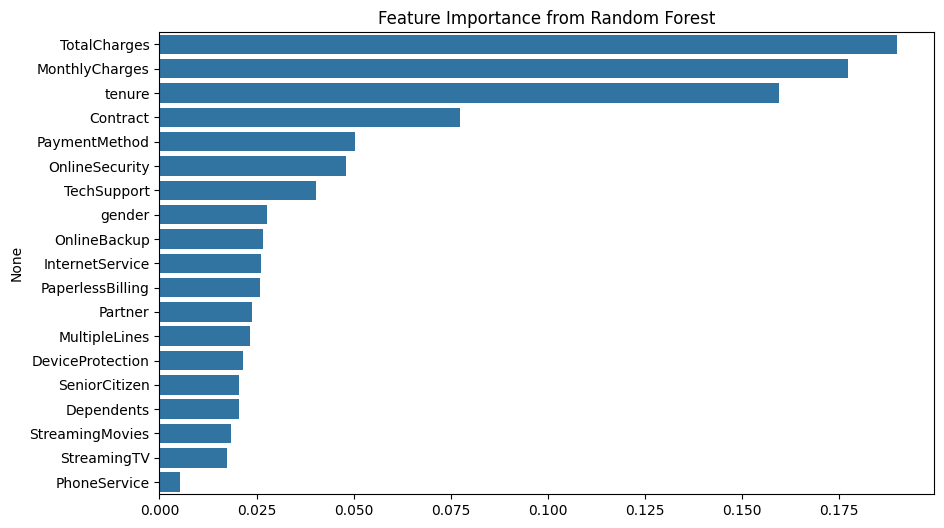

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
importances = rf.feature_importances_
features = X_train.columns

# Sort
indices = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance from Random Forest")
plt.show()

In [17]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("✅ XGBoost Accuracy:", acc_xgb)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:53:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.794180269694819

Confusion Matrix:
[[925 111]
 [179 194]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



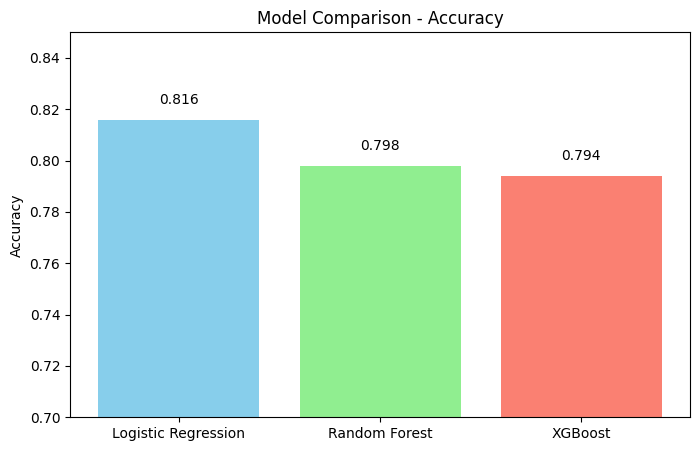

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Collect accuracy scores
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [0.816, 0.798, 0.794]  # Replace with your exact scores

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracy_scores, color=['skyblue','lightgreen','salmon'])
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.85)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval,3), ha='center', va='bottom')

plt.show()

Top 10 customers by predicted churn probability:


,customerID,Actual_Churn,Predicted_Churn,Churn_Prob
2208,7216-EWTRS,1,1,0.840574
1410,7024-OHCCK,1,1,0.826236
4800,9300-AGZNL,1,1,0.824186
2577,4910-GMJOT,1,1,0.807416
2191,3988-RQIXO,1,1,0.801530
3346,2545-EBUPK,0,1,0.798653
585,5192-EBGOV,1,1,0.791325
3352,9124-LHCJQ,1,1,0.788565
2184,4695-WJZUE,1,1,0.788296
2167,9061-TIHDA,1,1,0.786969


Saved churn_predictions_results.csv to working directory.


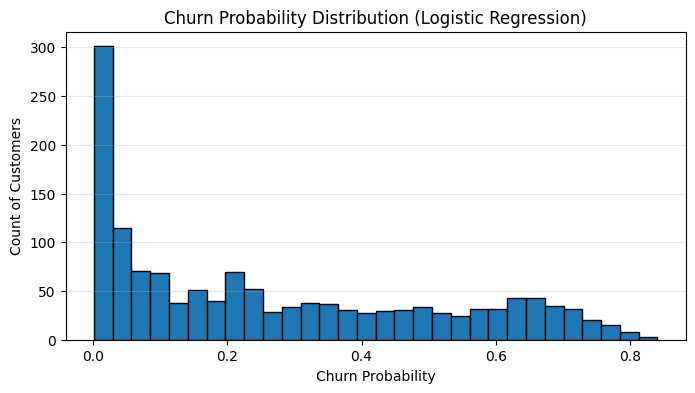

In [19]:
# === Build results safely and show top-risk customers ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Recompute predictions (use the logistic model variable you trained earlier)
# If your logistic model variable has a different name, replace log_reg accordingly.
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]   # probability of class=1 (churn)

# 2) Try to read original file to get customer IDs (safe even if you dropped it earlier)
import os
orig_fname = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
if os.path.exists(orig_fname):
    raw = pd.read_csv(orig_fname)
    if 'customerID' in raw.columns:
        cust_ids = raw.loc[X_test.index, 'customerID'].values
    else:
        # fallback: use the test index positions as IDs if customerID not present
        cust_ids = X_test.index.astype(str)
else:
    # fallback: use test indices as ID (if file not present)
    cust_ids = X_test.index.astype(str)

# 3) Build results DataFrame
results = pd.DataFrame({
    'customerID': cust_ids,
    'Actual_Churn': y_test.values,
    'Predicted_Churn': y_pred,
    'Churn_Prob': y_proba
}, index=X_test.index)

# 4) Show top 10 highest-risk customers
print("Top 10 customers by predicted churn probability:")
display(results.sort_values('Churn_Prob', ascending=False).head(10))

# 5) Save results to CSV for Power BI / later use
results.to_csv('churn_predictions_results.csv', index=False)
print("Saved churn_predictions_results.csv to working directory.")

# 6) Plot histogram of churn probabilities (risk distribution)
plt.figure(figsize=(8,4))
plt.hist(results['Churn_Prob'], bins=30, edgecolor='k')
plt.title('Churn Probability Distribution (Logistic Regression)')
plt.xlabel('Churn Probability')
plt.ylabel('Count of Customers')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [20]:
# === Add risk categories ===

def risk_bucket(prob):
    if prob >= 0.7:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

results['Risk_Level'] = results['Churn_Prob'].apply(risk_bucket)

# Check distribution of customers by risk
print("Risk segmentation distribution:")
print(results['Risk_Level'].value_counts())

# Show top 10 high-risk customers
print("\nTop 10 High-Risk Customers:")
display(results[results['Risk_Level']=="High Risk"].sort_values('Churn_Prob', ascending=False).head(10))

# Save updated file
results.to_csv('churn_predictions_with_risk.csv', index=False)
print("Saved churn_predictions_with_risk.csv with risk segmentation.")

Risk segmentation distribution:
Risk_Level
Low Risk       980
Medium Risk    347
High Risk       82
Name: count, dtype: int64

Top 10 High-Risk Customers:


,customerID,Actual_Churn,Predicted_Churn,Churn_Prob,Risk_Level
2208,7216-EWTRS,1,1,0.840574,High Risk
1410,7024-OHCCK,1,1,0.826236,High Risk
4800,9300-AGZNL,1,1,0.824186,High Risk
2577,4910-GMJOT,1,1,0.807416,High Risk
2191,3988-RQIXO,1,1,0.801530,High Risk
3346,2545-EBUPK,0,1,0.798653,High Risk
585,5192-EBGOV,1,1,0.791325,High Risk
3352,9124-LHCJQ,1,1,0.788565,High Risk
2184,4695-WJZUE,1,1,0.788296,High Risk
2167,9061-TIHDA,1,1,0.786969,High Risk


Saved churn_predictions_with_risk.csv with risk segmentation.


In [21]:
# Check distribution of all risk levels
print("Risk segmentation distribution (all customers):")
print(results['Risk_Level'].value_counts())

# Show a sample of each category
print("\nSample High-Risk Customers:")
display(results[results['Risk_Level']=="High Risk"].head(5))

print("\nSample Medium-Risk Customers:")
display(results[results['Risk_Level']=="Medium Risk"].head(5))

print("\nSample Low-Risk Customers:")
display(results[results['Risk_Level']=="Low Risk"].head(5))

Risk segmentation distribution (all customers):
Risk_Level
Low Risk       980
Medium Risk    347
High Risk       82
Name: count, dtype: int64

Sample High-Risk Customers:


,customerID,Actual_Churn,Predicted_Churn,Churn_Prob,Risk_Level
6179,6328-ZPBGN,1,1,0.770380,High Risk
3469,9402-ORRAH,0,1,0.730387,High Risk
4343,7130-VTEWQ,1,1,0.711911,High Risk
6633,4415-IJZTP,1,1,0.718587,High Risk
2167,9061-TIHDA,1,1,0.786969,High Risk



Sample Medium-Risk Customers:


,customerID,Actual_Churn,Predicted_Churn,Churn_Prob,Risk_Level
185,1024-GUALD,1,1,0.650559,Medium Risk
1807,6910-HADCM,1,1,0.580738,Medium Risk
4129,3192-LNKRK,0,0,0.422006,Medium Risk
3801,5914-DVBWJ,1,0,0.499022,Medium Risk
4640,1853-UDXBW,1,1,0.629551,Medium Risk



Sample Low-Risk Customers:


,customerID,Actual_Churn,Predicted_Churn,Churn_Prob,Risk_Level
2715,0484-JPBRU,0,0,0.058289,Low Risk
3825,3620-EHIMZ,0,0,0.004670,Low Risk
132,8587-XYZSF,0,0,0.005489,Low Risk
1263,6818-WOBHJ,1,0,0.307265,Low Risk
3732,3082-YVEKW,0,0,0.049278,Low Risk


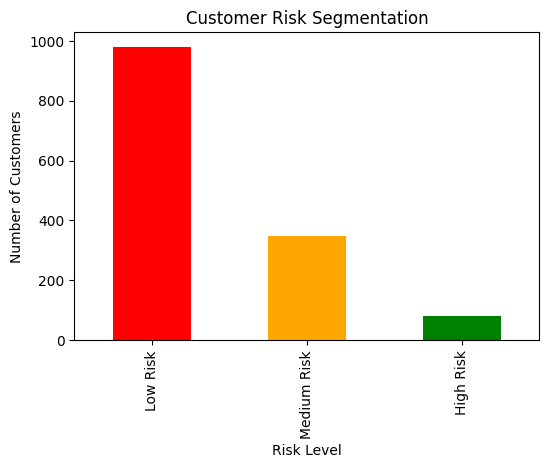

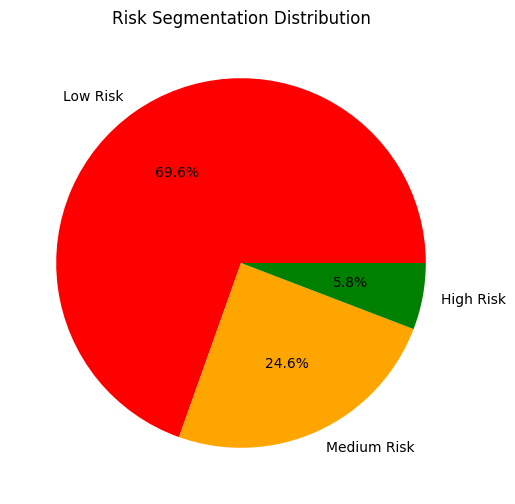

In [22]:
import matplotlib.pyplot as plt

# === Risk Segmentation Visualization ===
risk_counts = results['Risk_Level'].value_counts()

# Bar Chart
plt.figure(figsize=(6,4))
risk_counts.plot(kind='bar', color=['red','orange','green'])
plt.title("Customer Risk Segmentation")
plt.xlabel("Risk Level")
plt.ylabel("Number of Customers")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
risk_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red','orange','green'])
plt.title("Risk Segmentation Distribution")
plt.ylabel("")
plt.show()

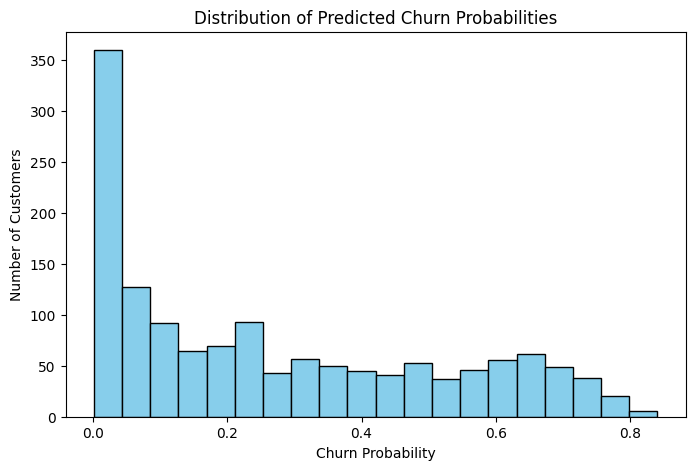

In [23]:
# === Churn Probability Distribution ===
plt.figure(figsize=(8,5))
plt.hist(results['Churn_Prob'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Predicted Churn Probabilities")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.show()

Loaded original file: WA_Fn-UseC_-Telco-Customer-Churn.csv
Merged rows: 1409  |  Missing Contract after merge: 0


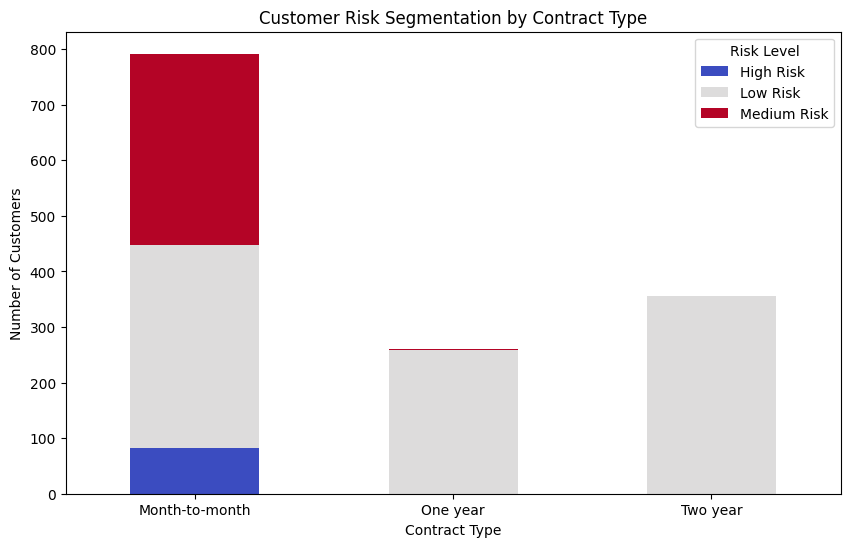

In [24]:
# --- Robust merge + segmentation plot ---
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure results exists
if 'results' not in globals():
    raise RuntimeError("results DataFrame not found. Re-run the predictions cell to recreate results.")

# 2) Load original CSV if needed (or use 'raw' if you have it)
orig_fname = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
if os.path.exists(orig_fname):
    orig = pd.read_csv(orig_fname)
    print(f"Loaded original file: {orig_fname}")
elif 'raw' in globals():
    orig = raw.copy()
    print("Using 'raw' DataFrame from session.")
else:
    raise FileNotFoundError(f"Original file '{orig_fname}' not found in working dir. Please upload it to Colab and try again.")

# 3) Quick checks
if 'customerID' not in orig.columns:
    raise KeyError("Original file does not contain 'customerID' column.")
if 'Contract' not in orig.columns:
    raise KeyError("Original file does not contain 'Contract' column.")

# 4) Make sure both keys are strings (avoid mismatch)
orig['customerID'] = orig['customerID'].astype(str)
results['customerID'] = results['customerID'].astype(str)

# 5) Merge results (left join to keep all prediction rows)
merged = pd.merge(results, orig[['customerID','Contract']], on='customerID', how='left')

# 6) Check merge health
missing_contract = merged['Contract'].isnull().sum()
print(f"Merged rows: {merged.shape[0]}  |  Missing Contract after merge: {missing_contract}")

# If many missing, show a few rows to debug
if missing_contract > 0:
    print("Sample rows with missing Contract (to inspect customerID format):")
    display(merged[merged['Contract'].isnull()].head())

# 7) Replace NaN Contracts with 'Unknown' (optional)
merged['Contract'] = merged['Contract'].fillna('Unknown')

# 8) Build & plot segmentation
seg = merged.groupby(['Contract','Risk_Level']).size().unstack(fill_value=0)
seg.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')

plt.title("Customer Risk Segmentation by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title='Risk Level')
plt.show()

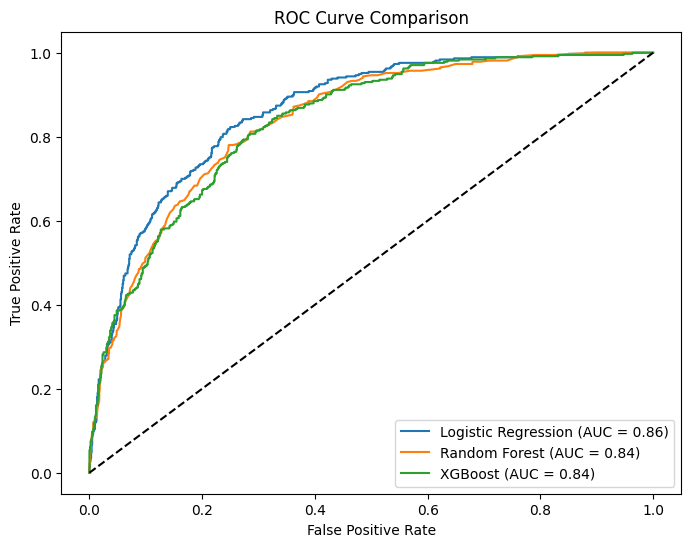

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for positive class (churn = 1)
y_prob_log = log_reg.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()